<a href="https://colab.research.google.com/github/SSAC-AI/AI/blob/main/0715_CNN(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pillow 라이브러리란?**
- Pillow는 Python의 대표적인 이미지 처리 라이브러리입니다.
- **PIL (Python Imaging Library)**의 공식 후속 프로젝트이며, 더 활발하게 유지보수되고 기능이 추가되고 있습니다.
- 주요 기능

| 기능        | 설명                               |
| --------- | -------------------------------- |
| 이미지 열기/저장 | 다양한 포맷 (JPG, PNG, BMP, GIF 등) 지원 |
| 이미지 변환    | 크기 조절, 자르기, 회전, 포맷 변환 등          |
| 필터 적용     | 블러, 샤픈, 엣지 디텍션 등 다양한 필터          |
| 텍스트 추가    | 이미지에 글씨 쓰기 (폰트 사용 가능)            |
| 색상 조작     | 색상 반전, 밝기 조절, 색상 변경 등            |
| 합성 및 마스킹  | 여러 이미지 합치기, 투명도 처리               |


In [1]:
# 📘 진짜 CNN 교육용 데모 - Google Colab용
# 사진 하나 업로드로 CNN 체험하기!

# 🔧 필요한 라이브러리 설치
!pip install tensorflow matplotlib pillow numpy

# 📦 라이브러리 임포트
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

**ReLU (Rectified Linear Unit)**
- 정의 : f(x)=max(0,x)
- 설명 : 입력값이 0보다 크면 그대로 출력, 0보다 작으면 0으로 만듭니다.
- 특징 :
1.   주로 **은닉층(hidden layer)**에서 사용
2.   비선형성을 주어 신경망이 복잡한 패턴을 학습 가능하게 함
3. 계산이 매우 빠름
4. 장점: 학습이 빠르고 효과적
5. 단점: 음수 입력은 모두 0이 되어서 죽은 뉴런(dead neuron) 문제가 발생할 수 있음
- 예시

| 입력값(x) | ReLU 출력값 |
| ------ | -------- |
| -3     | 0        |
| 0      | 0        |
| 2      | 2        |
| 5      | 5        |





**Softmax**
- 정의 : 다차원 입력값을 확률처럼 보이게 변환하는 함수입니다.
- 설명 : 전체 입력 벡터를 **확률 분포(0~1 사이, 합이 1)**로 변환합니다.
- 특징
1. 주로 **출력층(output layer)**에서 사용
2. 분류 문제에서 사용 (예: 고양이/강아지/토끼 분류)
3. 각 클래스의 확률을 보여줌
- 예시

| 입력값 (logit) | exp(입력값)    | Softmax 확률                              |
| ----------- | ----------- | --------------------------------------- |
| 2.0         | e² ≈ 7.39   | 7.39 / (7.39 + 2.72 + 1.11) ≈ **0.659** |
| 1.0         | e¹ ≈ 2.72   | 2.72 / (7.39 + 2.72 + 1.11) ≈ **0.242** |
| 0.1         | e⁰․¹ ≈ 1.11 | 1.11 / (7.39 + 2.72 + 1.11) ≈ **0.099** |
| **총합**      | **11.22**   | **1.0 (100%)**                          |


In [2]:
# 🧠 간단한 CNN 모델 생성
def create_simple_cnn():
    """
    교육용 간단한 CNN 모델 생성
    """
    model = tf.keras.Sequential([
        # 첫 번째 컨볼루션 레이어
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),

        # 두 번째 컨볼루션 레이어
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        # 세 번째 컨볼루션 레이어
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        # Flatten & Dense 레이어
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation='softmax')  # 3 classes: Animal/Car/Other
    ])

    # 모델 컴파일
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print("🧠 CNN 모델 생성 완료!")
    return model

# 📊 CNN 구조 시각화 함수 설명

이 함수는 생성된 **CNN 모델의 구조를 시각적으로 확인**하고, 각 레이어의 역할을 간단히 설명해줍니다.

---

## ✅ 주요 기능
- `model.summary()`로 전체 모델 구조 출력
- **레이어별 역할**을 쉽게 이해할 수 있는 설명 제공

---

## 🧩 레이어별 역할

- **📌 Conv2D** :  
  👉 이미지에서 **특징 추출** (엣지, 패턴 등 감지)
  
- **📌 MaxPooling2D** :  
  👉 **크기 축소** 및 **주요 특징 선택**  
  
- **📌 Flatten** :  
  👉 다차원(2D)을 **일차원(1D)** 데이터로 변환
  
- **📌 Dense** :  
  👉 **최종 분류 결정** (Fully Connected Layer)
  
- **📌 Dropout** :  
  👉 학습 시 일부 뉴런을 임시 비활성화하여 **과적합 방지**

In [4]:
# 📊 CNN 구조 시각화
def visualize_model_architecture(model):
    """
    CNN 모델 구조를 시각적으로 보여주기
    """
    print("\n📋 CNN 모델 구조:")
    print("=" * 50)
    model.summary()

    # 레이어별 설명
    print("\n🔍 레이어별 역할:")
    print("📌 Conv2D: 특징 추출 (엣지, 패턴 등)")
    print("📌 MaxPooling2D: 크기 축소 + 중요 특징 선택")
    print("📌 Flatten: 2D → 1D 변환")
    print("📌 Dense: 최종 분류 결정")
    print("📌 Dropout: 과적합 방지")

# 🔍 CNN 필터 시각화 함수 설명

이 함수는 **CNN 모델의 첫 번째 Conv2D 레이어 필터 가중치**를 시각화합니다.  
모델이 학습하면서 어떤 특징을 추출하는지 **직접 확인**할 수 있습니다.

---

## ✅ 주요 기능
- 모델이 **빌드되지 않았으면 자동 빌드**
- 첫 번째 **Conv2D 레이어 필터 추출**
- **필터 8개 시각화** (시각적 확인용)
- **에러 핸들링** 기능 포함 → 에러 발생 시 친절한 안내 출력

---

## 🧩 동작 과정

1. **모델 상태 확인**  
   ➡️ 빌드 여부 확인 후, 필요시 더미 입력으로 빌드 진행

2. **첫 번째 Conv2D 레이어 찾기**  
   ➡️ 순차적으로 탐색 후 가장 첫 Conv2D 추출

3. **가중치 추출 및 필터 시각화**  
   ➡️ 첫 번째 채널 기준으로 **최대 8개 필터 시각화**

4. **에러 처리**  
   ➡️ 문제 발생 시 오류 메시지 출력 & 원인 안내


In [ ]:
# 🔍 CNN 필터 시각화
def visualize_cnn_filters(model):
    """
    CNN 첫 번째 레이어의 학습된 필터들 시각화
    """
    try:
        # 모델이 빌드되었는지 확인
        if not hasattr(model, 'built') or not model.built:
            print("⚠️ 모델을 빌드하는 중...")
            dummy_input = np.random.rand(1, 64, 64, 3)
            _ = model(dummy_input)

        # 첫 번째 Conv2D 레이어 찾기
        first_conv_layer = None
        for layer in model.layers:
            if isinstance(layer, tf.keras.layers.Conv2D):
                first_conv_layer = layer
                break

        if first_conv_layer is None:
            print("❌ Conv2D 레이어를 찾을 수 없습니다.")
            return

        # 첫 번째 Conv2D 레이어의 가중치 추출
        weights = first_conv_layer.get_weights()
        if len(weights) == 0:
            print("⚠️ 아직 가중치가 초기화되지 않았습니다.")
            return

        filters = weights[0]  # 필터 가중치

        print(f"\n🔍 첫 번째 레이어 필터 시각화")
        print(f"필터 개수: {filters.shape[3]}개")
        print(f"필터 크기: {filters.shape[0]}x{filters.shape[1]}")

        # 필터 중 처음 8개만 시각화
        num_filters_to_show = min(8, filters.shape[3])
        fig, axes = plt.subplots(2, 4, figsize=(12, 6))
        fig.suptitle('CNN Learned Filters (First Layer)', fontsize=16)

        for i in range(num_filters_to_show):
            ax = axes[i // 4, i % 4]

            # 필터를 시각화하기 위해 정규화
            filter_img = filters[:, :, 0, i]  # 첫 번째 채널의 i번째 필터

            # 정규화 (0-1 범위로)
            if filter_img.max() > filter_img.min():
                filter_img = (filter_img - filter_img.min()) / (filter_img.max() - filter_img.min())

            ax.imshow(filter_img, cmap='viridis')
            ax.set_title(f'Filter {i+1}')
            ax.axis('off')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"⚠️ 필터 시각화 중 오류 발생: {str(e)}")
        print("💡 이는 모델 구조나 가중치 이슈일 수 있습니다.")
        print("📝 주요 기능(예측)은 정상 작동합니다!")

# 📸 이미지 업로드 및 전처리 함수 설명

이 함수는 **사용자가 직접 이미지를 업로드**하고,  
CNN 모델에 입력할 수 있도록 **전처리**를 진행합니다.

---

## ✅ 주요 기능

- **파일 업로드 인터페이스 제공** → colab `files.upload()` 사용
- **PIL 이미지 처리**:
    - RGBA → RGB 자동 변환
    - 크기 조정: **64 x 64 픽셀**
- **NumPy 배열 변환 및 정규화**:
    - 픽셀 값을 **0~1 범위**로 스케일링
- **CNN 입력용 형태로 변환**: `(1, 64, 64, 3)` 형태

---

## 📁 반환값

| 반환값 | 설명 |
|---------|-------|
| `image` | 원본 이미지 (PIL) |
| `image_resized` | 64x64로 조정된 이미지 (PIL) |
| `image_batch` | CNN 입력용 NumPy 배열 (배치 차원 포함) |
| `filename` | 업로드된 파일명 |


In [5]:
# 📸 이미지 업로드 및 전처리
def upload_and_preprocess_image():
    """
    이미지 업로드 및 CNN 입력용 전처리
    """
    print("📸 이미지를 업로드해주세요!")
    uploaded = files.upload()

    filename = list(uploaded.keys())[0]
    image_data = uploaded[filename]

    # 이미지 로드 및 전처리
    image = Image.open(io.BytesIO(image_data))

    # RGB로 변환 (RGBA인 경우)
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # 크기 조정 (64x64)
    image_resized = image.resize((64, 64))

    # 배열로 변환 및 정규화
    image_array = np.array(image_resized).astype('float32') / 255.0

    # 배치 차원 추가 (1, 64, 64, 3)
    image_batch = np.expand_dims(image_array, axis=0)

    return image, image_resized, image_batch, filename

# 🎯 CNN 예측 및 결과 시각화 함수 설명

이 함수는 **CNN 모델로 예측한 결과를 시각화**하고,  
**이미지와 예측 결과**를 직관적으로 보여줍니다.

---

## ✅ 주요 기능

- **CNN 예측 수행** → `model.predict()` 사용
- **가장 높은 확률의 클래스**를 자동 추출
- **이미지 2개 + 예측 결과 그래프** 3단 시각화
- **텍스트 기반 결과 정리 및 강조 출력**

---

## 📊 시각화 구성

| 시각화 구역 | 내용 |
|---|---|
| 1️⃣ | 원본 이미지 (`original_img`) |
| 2️⃣ | CNN 입력용 전처리 이미지 (`processed_img`) |
| 3️⃣ | 예측 확률 막대 그래프 (**가장 높은 확률 클래스 빨간색 강조**) |

- 그래프 위에 **확률(%)** 값 표시
- **최종 예측 결과**를 그래프 제목과 텍스트로 출력


In [6]:
# 🎯 CNN 예측 및 결과 시각화
def predict_and_visualize(model, original_img, processed_img, image_batch, filename):
    """
    CNN으로 예측하고 결과 시각화
    """
    # 클래스 라벨 정의
    class_names = ['Animal', 'Car', 'Other']

    # CNN 예측
    predictions = model.predict(image_batch, verbose=0)
    predicted_class = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class]

    # 결과 시각화
    plt.figure(figsize=(15, 5))

    # 원본 이미지
    plt.subplot(1, 3, 1)
    plt.imshow(original_img)
    plt.title(f'original image\n({filename})')
    plt.axis('off')

    # 전처리된 이미지 (CNN 입력)
    plt.subplot(1, 3, 2)
    plt.imshow(processed_img)
    plt.title('CNN input image\n(64x64 크기 조정)')
    plt.axis('off')

    # 예측 결과
    plt.subplot(1, 3, 3)
    bars = plt.bar(class_names, predictions[0])
    bars[predicted_class].set_color('red')  # 최고 확률 클래스 강조
    plt.title(f'CNN Prediction Results\nPrediction: {class_names[predicted_class]} ({confidence:.2%})')
    plt.ylabel('Probability')
    plt.ylim(0, 1)

    # 확률 값 표시
    for i, (name, prob) in enumerate(zip(class_names, predictions[0])):
        plt.text(i, prob + 0.02, f'{prob:.2%}', ha='center')

    plt.tight_layout()
    plt.show()

    # 결과 출력
    print("\n🎯 CNN Prediction Results:")
    print("=" * 30)
    for i, (name, prob) in enumerate(zip(class_names, predictions[0])):
        marker = "👉" if i == predicted_class else "  "
        print(f"{marker} {name}: {prob:.2%}")
    print("=" * 30)
    print(f"Final Prediction: {class_names[predicted_class]} (Confidence: {confidence:.2%})")

# 🔬 CNN 중간 레이어 활성화 시각화 함수 설명

이 함수는 **CNN의 중간 레이어들이 이미지에서 무엇을 감지하는지 시각화**합니다.  
CNN이 입력 이미지를 처리하는 **내부 작동 원리**를 직관적으로 확인할 수 있습니다.

---

## ✅ 주요 기능

- **Conv2D 레이어 자동 탐색** 후 활성화 맵 추출
- **중간 레이어 특징맵 최대 3개 시각화**
- **각 레이어별 상위 4개 필터 활성화 맵 표시**
- **해석 도움말**과 **에러 핸들링** 제공

---

## 📊 시각화 구성

| 시각화 내용 | 설명 |
|---|---|
| 1️⃣ Conv2D Layer 1 | 기본적인 **엣지/색상 패턴 감지** |
| 2️⃣ Conv2D Layer 2 | **더 복잡한 패턴 조합** |
| 3️⃣ Conv2D Layer 3 | **고수준 특징** (형태/구조) |

- 각 레이어에서 **4개 필터 활성화 맵** 표시
- **Viridis 컬러맵** 사용으로 직관적인 시각화


In [7]:
# 🔬 CNN 중간 레이어 활성화 시각화
def visualize_intermediate_activations(model, image_batch):
    """
    CNN 중간 레이어들의 활성화 맵 시각화
    """
    print("\n🔬 CNN 내부 작동 과정 시각화...")

    try:
        # 모델이 빌드되었는지 확인
        if not hasattr(model, 'built') or not model.built:
            print("⚠️ 모델을 빌드하는 중...")
            # 더미 데이터로 모델 빌드
            dummy_input = np.random.rand(1, 64, 64, 3)
            _ = model(dummy_input)

        # Conv2D 레이어만 찾기
        conv_layers = []
        layer_names = []

        for i, layer in enumerate(model.layers):
            if isinstance(layer, tf.keras.layers.Conv2D):
                conv_layers.append(layer)
                layer_names.append(f'Conv2D Layer {len(conv_layers)}')

        if len(conv_layers) == 0:
            print("❌ Conv2D 레이어를 찾을 수 없습니다.")
            return

        # 중간 레이어 출력을 위한 모델 생성
        layer_outputs = [layer.output for layer in conv_layers]
        activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

        # 활성화 맵 계산
        activations = activation_model.predict(image_batch, verbose=0)

        # 단일 출력인 경우 리스트로 변환
        if not isinstance(activations, list):
            activations = [activations]

        # 시각화
        num_layers = min(3, len(conv_layers))  # 최대 3개 레이어만
        plt.figure(figsize=(15, 10))

        for i in range(num_layers):
            activation = activations[i]
            layer_name = layer_names[i]

            # 처음 4개 필터만 표시
            num_filters = min(4, activation.shape[-1])
            for j in range(num_filters):
                plt.subplot(num_layers, 4, i*4 + j + 1)

                # 활성화 맵 정규화
                feature_map = activation[0, :, :, j]
                if feature_map.max() > feature_map.min():
                    feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())

                plt.imshow(feature_map, cmap='viridis')
                plt.title(f'{layer_name}\nFilter {j+1}')
                plt.axis('off')

        plt.suptitle('CNN Feature Maps - How CNN "Sees" Your Image', fontsize=16)
        plt.tight_layout()
        plt.show()

        print("💡 해석:")
        print("- 첫 번째 레이어: 기본적인 엣지, 색상 검출")
        print("- 두 번째 레이어: 더 복잡한 패턴 조합")
        print("- 세 번째 레이어: 고수준 특징 (객체 부분)")

    except Exception as e:
        print(f"⚠️ 활성화 시각화 중 오류 발생: {str(e)}")
        print("💡 이는 모델 구조나 TensorFlow 버전 이슈일 수 있습니다.")
        print("📝 주요 기능(예측)은 정상 작동합니다!")

📚 CNN 교육용 데모 - 실제 신경망으로 이미지 분류 체험
🔥 이번에는 진짜 CNN입니다!

🎉 진짜 CNN 교육용 데모 시작!
🧠 CNN 모델 생성 완료!

📋 CNN 모델 구조:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,011 (1.22 MB)

 Trainable params: 319,011 (1.22 MB)

 Non-trainable params: 0 (0.00 B)


🔍 레이어별 역할:
📌 Conv2D: 특징 추출 (엣지, 패턴 등)
📌 MaxPooling2D: 크기 축소 + 중요 특징 선택
📌 Flatten: 2D → 1D 변환
📌 Dense: 최종 분류 결정
📌 Dropout: 과적합 방지

🔍 첫 번째 레이어 필터 시각화
필터 개수: 16개
필터 크기: 3x3


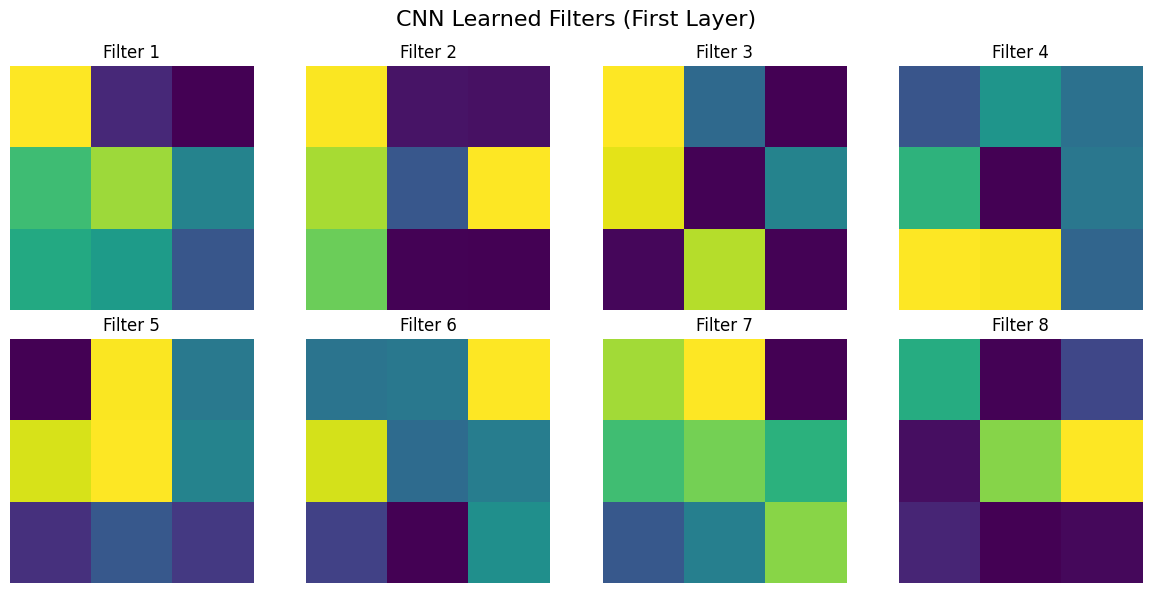

📸 이미지를 업로드해주세요!


Saving car.jpg to car (1).jpg


/tmp/ipython-input-6-909547488.py:41: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-6-909547488.py:41: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-6-909547488.py:41: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-6-909547488.py:41: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/d

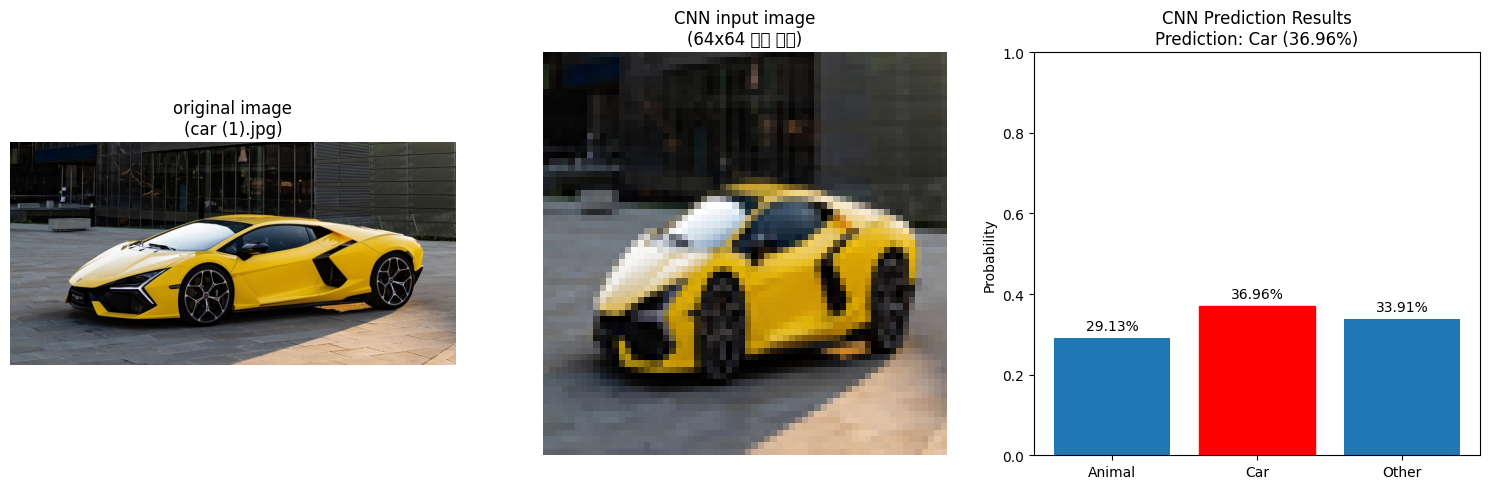


🎯 CNN Prediction Results:
   Animal: 29.13%
👉 Car: 36.96%
   Other: 33.91%
Final Prediction: Car (Confidence: 36.96%)

🔬 CNN 내부 작동 과정 시각화...
⚠️ 활성화 시각화 중 오류 발생: The layer sequential_2 has never been called and thus has no defined input.
💡 이는 모델 구조나 TensorFlow 버전 이슈일 수 있습니다.
📝 주요 기능(예측)은 정상 작동합니다!

🎓 CNN 데모 완료!
💡 이제 CNN이 어떻게 이미지를 '이해'하는지 보셨습니다!


In [10]:
# 🎮 메인 실행 함수
def run_cnn_demo():
    """
    CNN 교육용 데모 메인 실행
    """
    print("🎉 진짜 CNN 교육용 데모 시작!")
    print("=" * 50)

    # 1. CNN 모델 생성
    model = create_simple_cnn()

    # 2. 모델 구조 확인
    visualize_model_architecture(model)

    # 3. 학습된 필터 시각화
    visualize_cnn_filters(model)

    # 4. 이미지 업로드 및 예측
    original_img, processed_img, image_batch, filename = upload_and_preprocess_image()

    # 5. CNN 예측 및 결과 시각화
    predict_and_visualize(model, original_img, processed_img, image_batch, filename)

    #6. CNN 내부 작동 과정 시각화
    visualize_intermediate_activations(model, image_batch)

    print("\n🎓 CNN 데모 완료!")
    print("💡 이제 CNN이 어떻게 이미지를 '이해'하는지 보셨습니다!")

# 🚀 데모 실행
print("📚 CNN 교육용 데모 - 실제 신경망으로 이미지 분류 체험")
print("🔥 이번에는 진짜 CNN입니다!")
print()
run_cnn_demo()